In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('wine_Austral2.dat', sep='\t')
df[['dry', 'month_']].head()

,dry,month_
0,1954,1
1,2302,2
2,3054,3
3,2414,4
4,2226,5


In [5]:
df[['dry', 'month_']].describe()

,dry,month_
count,174.000000,174.000000
mean,3196.724138,6.396552
std,682.859826,3.460460
min,1954.000000,1.000000
25%,2726.500000,3.000000
50%,3073.000000,6.000000
75%,3629.500000,9.000000
max,5587.000000,12.000000


In [6]:
len(df)

174

0. Пропусков нет. Рассмотрим ряд под названием "dry":

<AxesSubplot:>

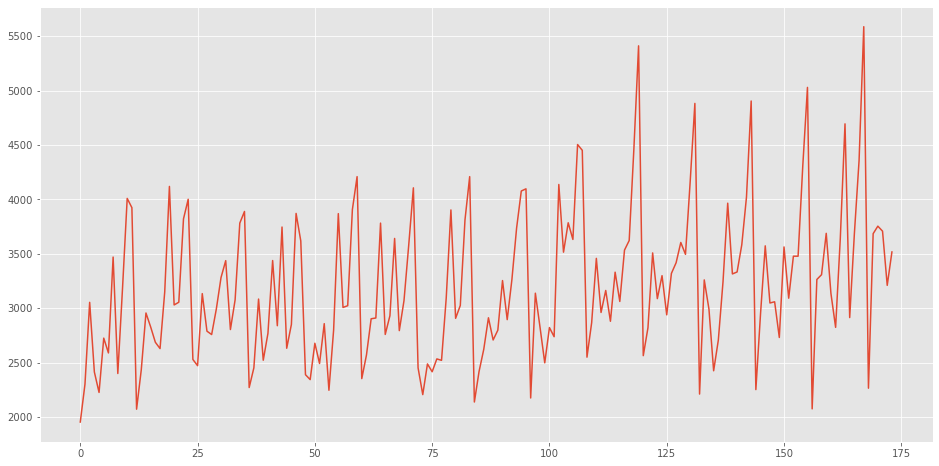

In [7]:
y = df["dry"]
plt.figure(figsize=(16,8))
y.plot()

Наблюдается отличие в модели поведения ряда на первых годах наблюдений

1. Есть ли у ряда тренд? Если есть, то какой аналитической функцией его можно аппроксимировать? </br>
Тренд есть, линейная функция.

2. Есть ли у ряда сезонность? Аддитивная или мультипликативная или какая-то еще? </br>
Есть сезонность, мультипликативная.

3. Меняет ли ряд свой характер? Если да, то нужно отбросить ранние наблюдения. </br>
В целом можно сказать, что не меняет.

4. Есть ли у ряда выбросы? Выброс может изменить модель и испортить прогноз. Заменяем выброс на более разумное значение. </br>
Выбросов нет.

Логарифмируем ряд, хотя особой необходимости в этом нет:

In [8]:
df_1 = df[['dry', 'month_']]

df_1['log_dry'] = np.log10(df_1["dry"])

<AxesSubplot:>

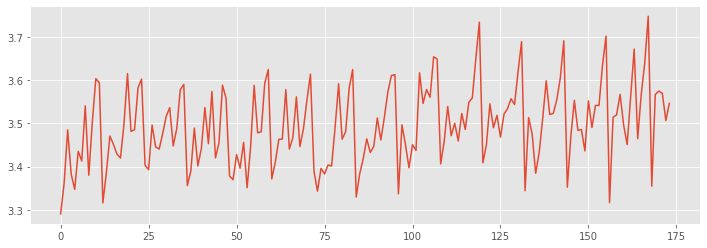

In [9]:
fig = plt.figure(figsize=(12, 4))
df_1['log_dry'].plot()

Сезонные поправки стали аддитивными, что подтверждает гипотезу о мультипликативном характере сезонности исходного ряда.

In [10]:
df_1['month_num'] = range(1, len(df_1) + 1)
df_1['month_num_2'] = df_1['month_num']**2

In [11]:
df_1

,dry,month_,log_dry,month_num,month_num_2
0,1954,1,3.290925,1,1
1,2302,2,3.362105,2,4
2,3054,3,3.484869,3,9
3,2414,4,3.382737,4,16
4,2226,5,3.347525,5,25
...,...,...,...,...,...
169,3685,2,3.566437,170,28900
170,3754,3,3.574494,171,29241
171,3708,4,3.569140,172,29584
172,3210,5,3.506505,173,29929


Отбрасываем исходный ряд:

In [12]:
df_2 = df_1.drop(columns=['dry', 'month_'])
df_2.head()

,log_dry,month_num,month_num_2
0,3.290925,1,1
1,3.362105,2,4
2,3.484869,3,9
3,3.382737,4,16
4,3.347525,5,25


Создадим новые переменные - сезонные индикаторы месяцев:

In [13]:
df_2["m01"] = ([1,0,0,0,0,0,0,0,0,0,0,0]*15)[0:len(df)]
df_2["m02"] = ([0,1,0,0,0,0,0,0,0,0,0,0]*15)[0:len(df)]
df_2["m03"] = ([0,0,1,0,0,0,0,0,0,0,0,0]*15)[0:len(df)]
df_2["m04"] = ([0,0,0,1,0,0,0,0,0,0,0,0]*15)[0:len(df)]
df_2["m05"] = ([0,0,0,0,1,0,0,0,0,0,0,0]*15)[0:len(df)]
df_2["m06"] = ([0,0,0,0,0,1,0,0,0,0,0,0]*15)[0:len(df)]
df_2["m07"] = ([0,0,0,0,0,0,1,0,0,0,0,0]*15)[0:len(df)]
df_2["m08"] = ([0,0,0,0,0,0,0,1,0,0,0,0]*15)[0:len(df)]
df_2["m09"] = ([0,0,0,0,0,0,0,0,1,0,0,0]*15)[0:len(df)]
df_2["m10"] = ([0,0,0,0,0,0,0,0,0,1,0,0]*15)[0:len(df)]
df_2["m11"] = ([0,0,0,0,0,0,0,0,0,0,1,0]*15)[0:len(df)]
df_2["m12"] = ([0,0,0,0,0,0,0,0,0,0,0,1]*15)[0:len(df)]

In [14]:
df_2.head()

,log_dry,month_num,month_num_2,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,3.290925,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,3.362105,2,4,0,1,0,0,0,0,0,0,0,0,0,0
2,3.484869,3,9,0,0,1,0,0,0,0,0,0,0,0,0
3,3.382737,4,16,0,0,0,1,0,0,0,0,0,0,0,0
4,3.347525,5,25,0,0,0,0,1,0,0,0,0,0,0,0


In [15]:
# Создаем матрицу предикторов. Не удаляем столбец, соответствующий базовому месяцу:
X = df_2.drop(columns=["log_dry"])

In [16]:
#  Создаем матрицу откликов:
y = df_2['log_dry']

In [17]:
from sklearn.ensemble import RandomForestRegressor

Случайный лес не может предсказывать ряд с трендом, поэтому будем предсказывать ряд из разностей логарифмов значений исходного ряда.

In [18]:
# Для отклика возьмем разности:

y_2 = y.diff(periods=1).dropna()
y_2

1      0.071181
2      0.122764
3     -0.102132
4     -0.035212
5      0.087841
         ...   
169    0.211369
170    0.008057
171   -0.005355
172   -0.062635
173    0.039667
Name: log_dry, Length: 173, dtype: float64

In [19]:
#  В матрице предикторов отбрасываем первую строку, там у y_2 появилось NaN

X_2 = X[1:]

In [20]:
#  все нормально?
X_2.head()

,month_num,month_num_2,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
1,2,4,0,1,0,0,0,0,0,0,0,0,0,0
2,3,9,0,0,1,0,0,0,0,0,0,0,0,0
3,4,16,0,0,0,1,0,0,0,0,0,0,0,0
4,5,25,0,0,0,0,1,0,0,0,0,0,0,0
5,6,36,0,0,0,0,0,1,0,0,0,0,0,0


In [21]:
model = RandomForestRegressor(random_state=42, n_estimators=250).fit(X_2, y_2)

Посмотрим на подгонку и ряд разностей:

<AxesSubplot:>

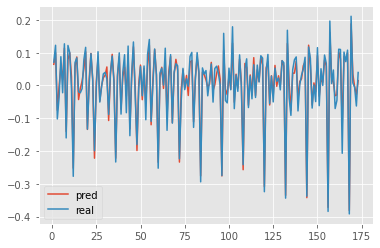

In [22]:
pred = pd.DataFrame({
    'pred': model.predict(X_2),
    'real': y_2})
pred.plot()

Посмотрим на критерий качества - сумма квадратов отклонений:

In [23]:
print("SSE = ", sum((y_2 - model.predict(X_2))**2))

SSE =  0.08421448069223522


In [24]:
print(model.predict(X_2))

[ 0.064561    0.10000129 -0.07578589 -0.00268011  0.05906667  0.01750418
  0.11408878 -0.14051342  0.07911261  0.09998479  0.02684636 -0.25231504
  0.05811718  0.08700084 -0.04297746 -0.00886736  0.01365534  0.05082539
  0.10280704 -0.13414634  0.01933439  0.0977528   0.01514615 -0.22200467
  0.00954895  0.08614091 -0.04781619 -0.00039465  0.02365227  0.03113697
  0.05656823 -0.10698682  0.03258778  0.0951031   0.01673311 -0.22191998
  0.02698224  0.08815865 -0.07251341  0.02672199  0.05599025 -0.03193631
  0.09408993 -0.13244051  0.02238735  0.11805892 -0.00777461 -0.19860431
  0.00580671  0.06229677 -0.04337347  0.05236834 -0.05503009  0.0581558
  0.12262988 -0.11994589  0.0162659   0.10990532  0.03269342 -0.23432962
  0.02586317  0.0556155  -0.00898364  0.07950446 -0.09719257  0.04246536
  0.08855481 -0.11355421  0.03391025  0.07981015  0.04629158 -0.23388896
 -0.01196753  0.04774366 -0.00761478  0.03064118 -0.03048539  0.07128826
  0.07602226 -0.11107761  0.02492477  0.08689414  0.

In [25]:
#  От подгонки разностей переходим к подгонке ряда логарифмов

res = model.predict(X_2)
a = [df_1['log_dry'][0]]
for i in res:
    a.append(a[-1] + i)

print(a)

[3.2909245593827543, 3.35548555989645, 3.455486844913836, 3.3797009557377216, 3.377020841287673, 3.436087514676176, 3.453591694079218, 3.5676804751985403, 3.4271670557505702, 3.5062796693869758, 3.6062644633822014, 3.633110827389375, 3.3807957850829196, 3.4389129683574104, 3.525913807228044, 3.4829363521562167, 3.4740689887789253, 3.4877243316563233, 3.5385497178698597, 3.641356760573146, 3.50721042404476, 3.5265448132087327, 3.624297616401192, 3.6394437668920268, 3.417439100518419, 3.4269880530928805, 3.513128961203921, 3.4653127696299646, 3.4649181220335272, 3.4885703931709027, 3.5197073628975497, 3.5762755941067312, 3.4692887766132263, 3.5018765517780537, 3.5969796489038086, 3.613712759034846, 3.3917927837322885, 3.4187750225153137, 3.5069336750158646, 3.434420267567157, 3.461142261512146, 3.5171325103902715, 3.485196204252924, 3.579286129273246, 3.446845620961061, 3.469232966233608, 3.587291888861386, 3.5795172802226576, 3.3809129751301037, 3.3867196838481197, 3.44901645058193, 3.4

<AxesSubplot:>

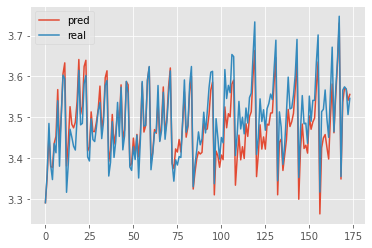

In [26]:
#  Сравним подгонку и ряд

pred = pd.DataFrame({
    'pred': a,
    'real': y})
pred.plot()

Строим прогноз на 12 месяцев вперед:

In [27]:
horizon = 12
df_3= pd.DataFrame()

df_3['month_num'] = range((len(df)+1), (len(df)+horizon+1))
df_3['month_num_2'] = df_3['month_num']**2

In [28]:
len(df)+horizon

186

In [29]:
#  Добавляем индикаторы месяцев:
df_3["m07"] = ([1,0,0,0,0,0,0,0,0,0,0,0])[0:horizon]
df_3["m08"] = ([0,1,0,0,0,0,0,0,0,0,0,0])[0:horizon]
df_3["m09"] = ([0,0,1,0,0,0,0,0,0,0,0,0])[0:horizon]
df_3["m10"] = ([0,0,0,1,0,0,0,0,0,0,0,0])[0:horizon]
df_3["m11"] = ([0,0,0,0,1,0,0,0,0,0,0,0])[0:horizon]
df_3["m12"] = ([0,0,0,0,0,1,0,0,0,0,0,0])[0:horizon]
df_3["m01"] = ([0,0,0,0,0,0,1,0,0,0,0,0])[0:horizon]
df_3["m02"] = ([0,0,0,0,0,0,0,1,0,0,0,0])[0:horizon]
df_3["m03"] = ([0,0,0,0,0,0,0,0,1,0,0,0])[0:horizon]
df_3["m04"] = ([0,0,0,0,0,0,0,0,0,1,0,0])[0:horizon]
df_3["m05"] = ([0,0,0,0,0,0,0,0,0,0,1,0])[0:horizon]
df_3["m06"] = ([0,0,0,0,0,0,0,0,0,0,0,1])[0:horizon]

In [30]:
df_3.head()

,month_num,month_num_2,m07,m08,m09,m10,m11,m12,m01,m02,m03,m04,m05,m06
0,175,30625,1,0,0,0,0,0,0,0,0,0,0,0
1,176,30976,0,1,0,0,0,0,0,0,0,0,0,0
2,177,31329,0,0,1,0,0,0,0,0,0,0,0,0
3,178,31684,0,0,0,1,0,0,0,0,0,0,0,0
4,179,32041,0,0,0,0,1,0,0,0,0,0,0,0


In [31]:
# Прогноз для разностей:
model.predict(df_3)

array([-0.38155288,  0.15632571,  0.02199545, -0.00324719, -0.02259884,
        0.01480978,  0.06888352,  0.04188564, -0.11948318,  0.04214402,
        0.06331086,  0.05156481])

In [32]:
# Переходим к прогнозу для логарфмов:
res = model.predict(df_3)
a2 = [df_1["log_dry"][len(df)-1]]
for i in res:
    a2.append(a2[-1] + i)

print(a2)

[3.5461723683169426, 3.164619489136264, 3.3209452019612873, 3.342940652466243, 3.339693465479534, 3.3170946255711655, 3.3319044041460146, 3.4007879290168184, 3.442673568820529, 3.3231903926195736, 3.3653344174196174, 3.4286452810502235, 3.480210088772772]


In [33]:
pred['forecast'] = np.nan
pred.head()

,pred,real,forecast
0,3.290925,3.290925,NaN
1,3.355486,3.362105,NaN
2,3.455487,3.484869,NaN
3,3.379701,3.382737,NaN
4,3.377021,3.347525,NaN


In [34]:
df_4 = pd.DataFrame(a2, columns=['forecast'])
df_4['real'] = np.nan
df_4['pred'] = np.nan

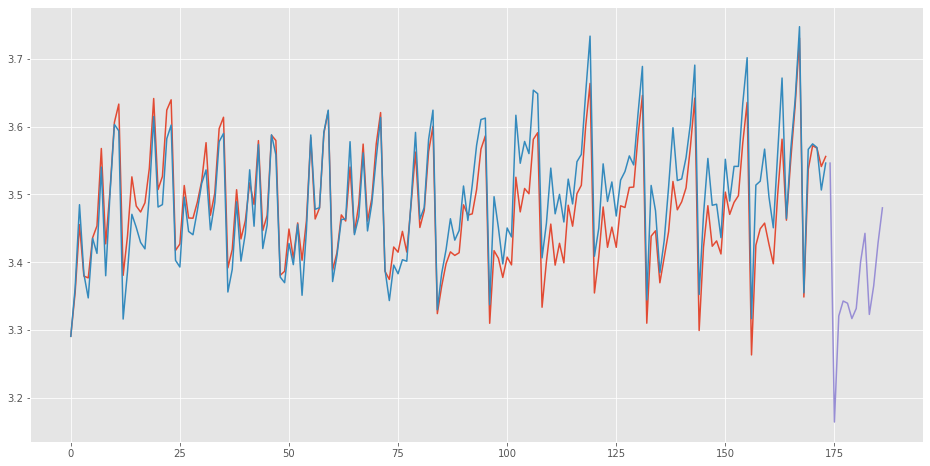

In [35]:
pred_1 = pd.concat(
    [pred, df_4],
    sort=False
).reset_index(drop=True)

plt.figure(figsize=(16,8))
plt.plot(pred_1)
plt.show()

In [36]:
#  Возвращаемся к исходному ряду:
pred_11 = 10**pred_1

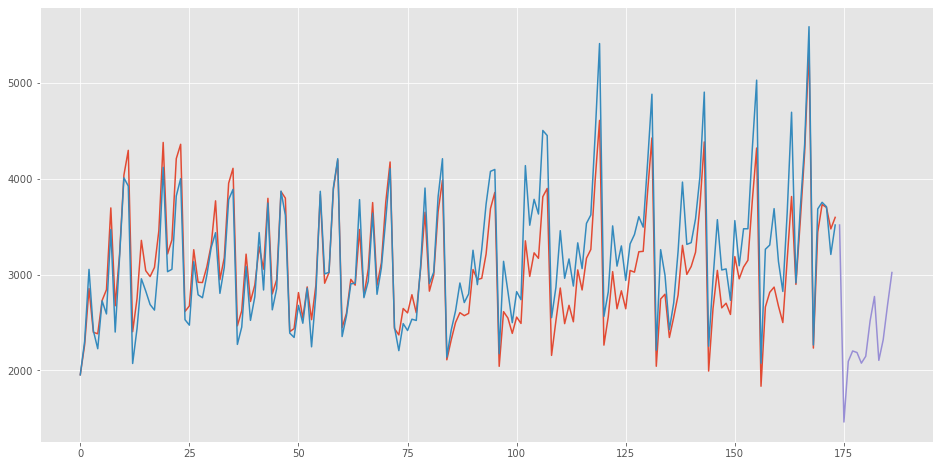

In [37]:
plt.figure(figsize=(16,8))
plt.plot(pred_11)
plt.show()